In [39]:
import pandas as pd


In [40]:
train=pd.read_csv('fashion-mnist_train.csv')
test=pd.read_csv('fashion-mnist_test.csv')

In [41]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
trainx=train.drop('label',axis=1)
trainy=train['label']


In [43]:
testx=test.drop('label',axis=1)
testy=test['label']


In [44]:
trainx=trainx.to_numpy()
trainy=trainy.to_numpy()

testx=testx.to_numpy()
testy=testy.to_numpy()

In [45]:
trainx.shape

(60000, 784)

In [46]:
trainy.shape

(60000,)

In [47]:
testx.shape

(10000, 784)

In [48]:
trainx=trainx.reshape((60000,28,28))
testx=testx.reshape((10000,28,28))

In [49]:
trainx.shape

(60000, 28, 28)

In [50]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [51]:
ann=models.Sequential([
    layers.Flatten(input_shape=(28,28)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid')
])

ann.compile(optimizer='adam',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])



In [52]:
ann.fit(trainx,trainy,epochs=2)

Epoch 1/2
1875/1875 [==============================] - 134s 71ms/step - loss: 3.1773 - accuracy: 0.7930
Epoch 2/2
1875/1875 [==============================] - 132s 70ms/step - loss: 0.4497 - accuracy: 0.8400


In [53]:
ann.evaluate(testx,testy)

313/313 [==============================] - 3s 9ms/step - loss: 0.4348 - accuracy: 0.8443


[0.4347638189792633, 0.8442999720573425]

In [78]:
cnn=models.Sequential([
     layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Flatten(input_shape=(28,28)),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='softmax')
])

cnn.compile(optimizer='adam',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])

In [67]:
help(layers.MaxPooling2D)

Help on class MaxPooling2D in module keras.layers.pooling.max_pooling2d:

class MaxPooling2D(keras.layers.pooling.base_pooling2d.Pooling2D)
 |  MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None, **kwargs)
 |  
 |  Max pooling operation for 2D spatial data.
 |  
 |  Downsamples the input along its spatial dimensions (height and width)
 |  by taking the maximum value over an input window
 |  (of size defined by `pool_size`) for each channel of the input.
 |  The window is shifted by `strides` along each dimension.
 |  
 |  The resulting output,
 |  when using the `"valid"` padding option, has a spatial shape
 |  (number of rows or columns) of:
 |  `output_shape = math.floor((input_shape - pool_size) / strides) + 1`
 |  (when `input_shape >= pool_size`)
 |  
 |  The resulting output shape when using the `"same"` padding option is:
 |  `output_shape = math.floor((input_shape - 1) / strides) + 1`
 |  
 |  For example, for `strides=(1, 1)` and `padding="valid"`:


In [79]:
cnn.fit(trainx,trainy,epochs=2)

Epoch 1/2
1875/1875 [==============================] - 56s 29ms/step - loss: 0.6832 - accuracy: 0.7955
Epoch 2/2
1875/1875 [==============================] - 56s 30ms/step - loss: 0.3780 - accuracy: 0.8604


In [80]:
cnn.evaluate(testx,testy)

313/313 [==============================] - 3s 8ms/step - loss: 0.3299 - accuracy: 0.8781


[0.32986700534820557, 0.8780999779701233]

In [81]:
import matplotlib.pyplot as plt
def plot(x,y,i):
    plt.figure(figsize=(15,2))
    plt.imshow(x[i])
    plt.xlabel(y[i])

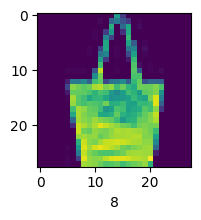

In [84]:
plot(trainx,trainy,9)

In [85]:
ypred=cnn.predict(testx)

313/313 [==============================] - 3s 8ms/step


In [86]:
ypred[:5]

array([[6.75855577e-01, 4.64260265e-05, 1.53297270e-02, 5.47452411e-03,
        1.37701328e-03, 3.58491197e-05, 3.00648421e-01, 1.11107465e-06,
        1.22697325e-03, 4.34122649e-06],
       [4.86380762e-11, 1.00000000e+00, 5.26627700e-11, 8.60250182e-09,
        2.36755873e-13, 1.41387203e-16, 1.86333615e-10, 3.11800868e-17,
        4.47591226e-12, 1.27010605e-17],
       [5.11378497e-02, 2.28113572e-06, 9.03957307e-01, 5.17650507e-03,
        2.66461226e-04, 1.88242357e-05, 3.94154713e-02, 5.77993440e-08,
        2.42607493e-05, 1.00424404e-06],
       [2.79291067e-03, 1.55141272e-04, 9.41043198e-01, 1.79380237e-03,
        3.54846846e-03, 2.62495669e-05, 5.06125726e-02, 1.31774144e-07,
        2.75725561e-05, 3.81775429e-08],
       [2.92227254e-03, 2.19514011e-03, 1.41828014e-02, 9.19780791e-01,
        5.63682569e-03, 7.60862255e-04, 2.70156059e-02, 2.77996296e-05,
        2.74327770e-02, 4.50392909e-05]], dtype=float32)

In [87]:
import numpy as np
yclass=[np.argmax(e) for e in ypred]

In [88]:
yclass[:5]

[0, 1, 2, 2, 3]

In [89]:
testy[:5]

array([0, 1, 2, 2, 3], dtype=int64)